In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_signals(df, title = "Signal Plot with Seaborn"):
    """
    Funkcija za prikaz signalov iz DataFrame-a z uporabo Seaborn.

    Args:
        df (pandas.DataFrame): DataFrame, ki vsebuje časovni stolpec ('time') in signale.
    """
    # Preoblikuj DataFrame v dolgo obliko za Seaborn
    df_melted = df.melt(id_vars="time", var_name="Signal", value_name="Value")
    
    # Ustvari graf z uporabo Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x="time", y="Value", hue="Signal", palette="tab10")
    
    # Nastavitve grafa
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.grid(True)
    plt.legend(title='Signals')
    plt.show()

# Klic funkcije za prikaz signalov
#plot_signals(generiraniSignali)

In [4]:
def generate_rand_signals(time, mu, std, N, distribution="normal", correlation=None):
    """
    Funkcija generira naključne podatke za N signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        N (int): Število signalov.
        distribution (str): Type of distribution ('normal', 'uniform', 'exponential').
        correlation (np.ndarray): Correlation matrix for individuals' pupil sizes.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """

    # Generate pupil size data based on distribution
    if distribution == "normal":
        if correlation is None:
            data = np.random.normal(mu, std, size=(len(time), N))
        else:
            cov_matrix = correlation * std**2
            data = np.random.multivariate_normal([mu] * N, cov_matrix, len(time))
    elif distribution == "uniform":
        data = np.random.uniform(mu - std, mu + std, size=(len(time), N))
    elif distribution == "exponential":
        data = np.random.exponential(scale=std, size=(len(time), N)) + mu
    else:
        raise ValueError("Unsupported distribution type. Choose 'normal', 'uniform', or 'exponential'.")
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    randomSignal_df = pd.DataFrame(data, columns=[f"signal_{i+1}" for i in range(N)])
    randomSignal_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    

    #sklearn knjižnica
    #scipy signal preveri ac, 
    return randomSignal_df

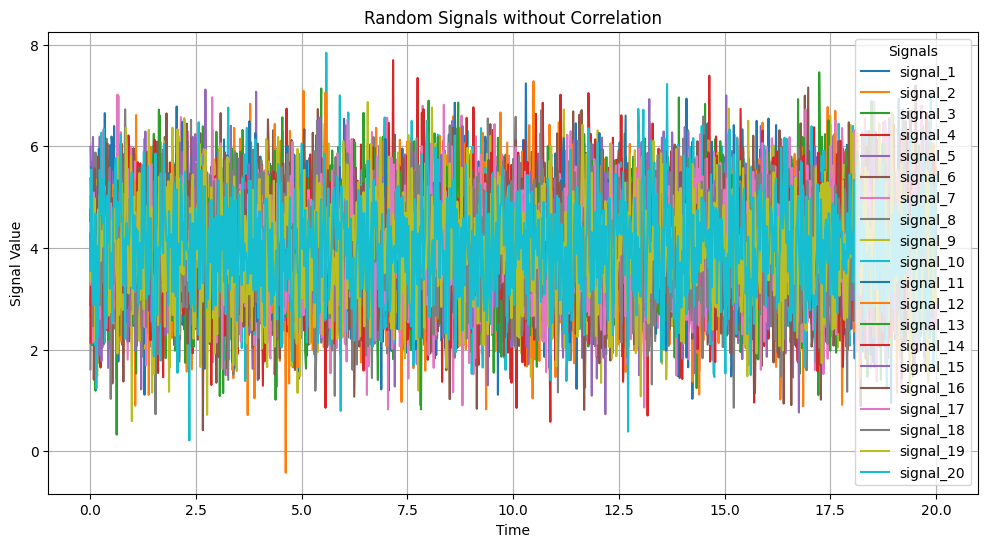

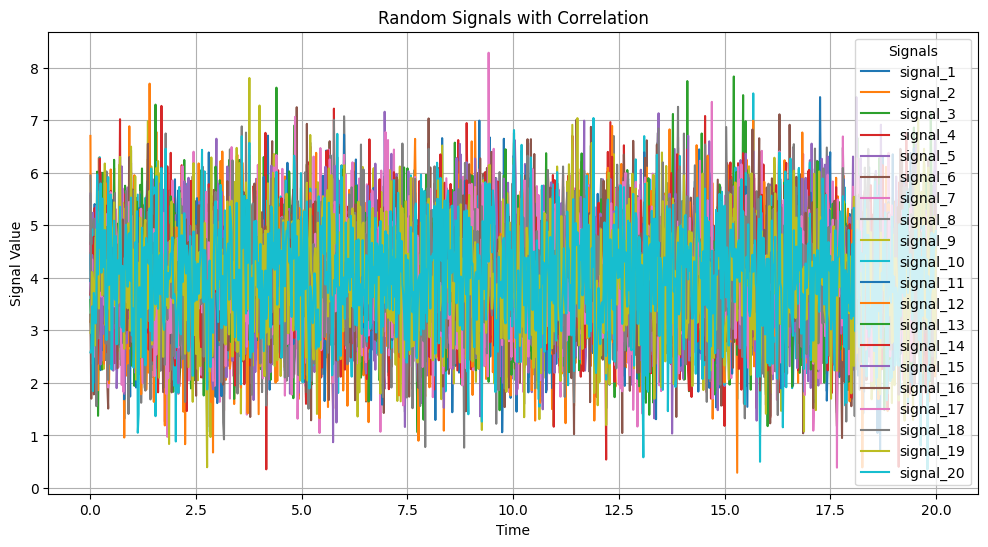

In [5]:
# Primer uporabe:
time = np.arange(0, 20.02, 0.02)  # Časovni intervali od 0 do 20 s korakom 0.02
mu = 4                            # Povprečje
std = 1                           # Standardni odklon
N = 20                            # Število signalov

# Generiraj podatke
random_signals = generate_rand_signals(time=time, mu=mu, std=std, N=N)
plot_signals(random_signals, title="Random Signals without Correlation")

correlation_matrix = np.eye(N) * 0.8 + 0.2  # Korelacijska matrika z delno korelacijo med posamezniki
signals_with_corr = generate_rand_signals(time=time, mu=mu, std=std, N=N, correlation=correlation_matrix)
plot_signals(signals_with_corr, title="Random Signals with Correlation")

# correlation_matrix = np.eye(N) * 0.95 + 0.5  # Korelacijska matrika z delno korelacijo med posamezniki
# signals_with_corr_strong = generate_rand_signals(time=time, mu=mu, std=std, N=N, correlation=correlation_matrix)
# plot_signals(signals_with_corr_strong, title="Random Signals with Strong Correlation")

# correlation_matrix = np.eye(N) * 0.5 + 0.1  # Korelacijska matrika z delno korelacijo med posamezniki
# signals_with_corr_weak = generate_rand_signals(time=time, mu=mu, std=std, N=N, correlation=correlation_matrix)
# plot_signals(signals_with_corr_weak, title="Random Signals with Weak Correlation")

c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


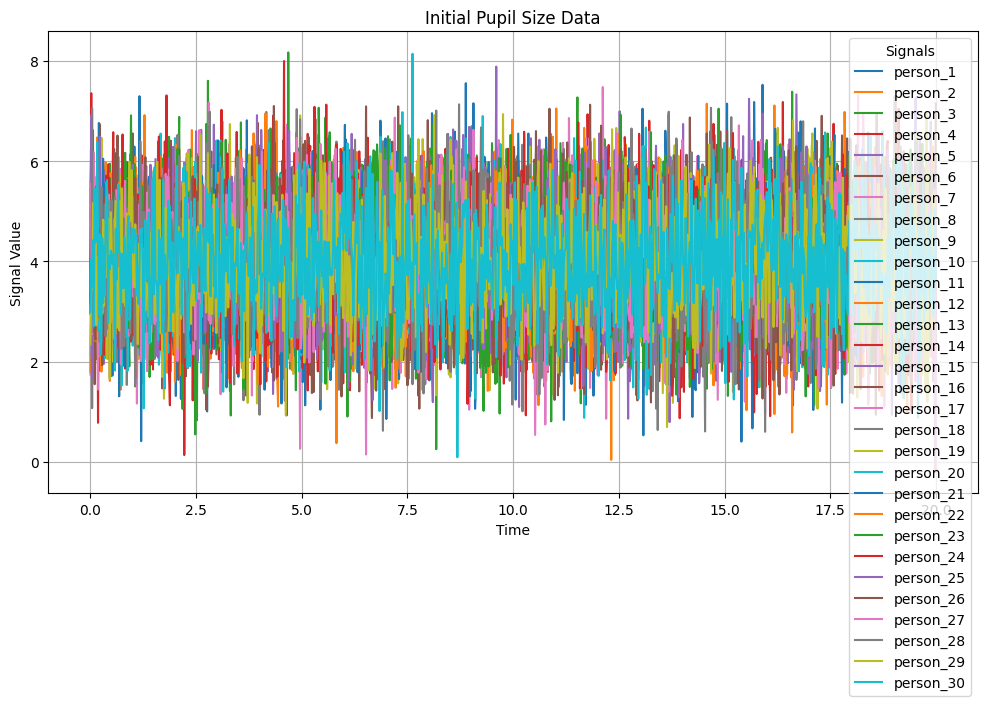

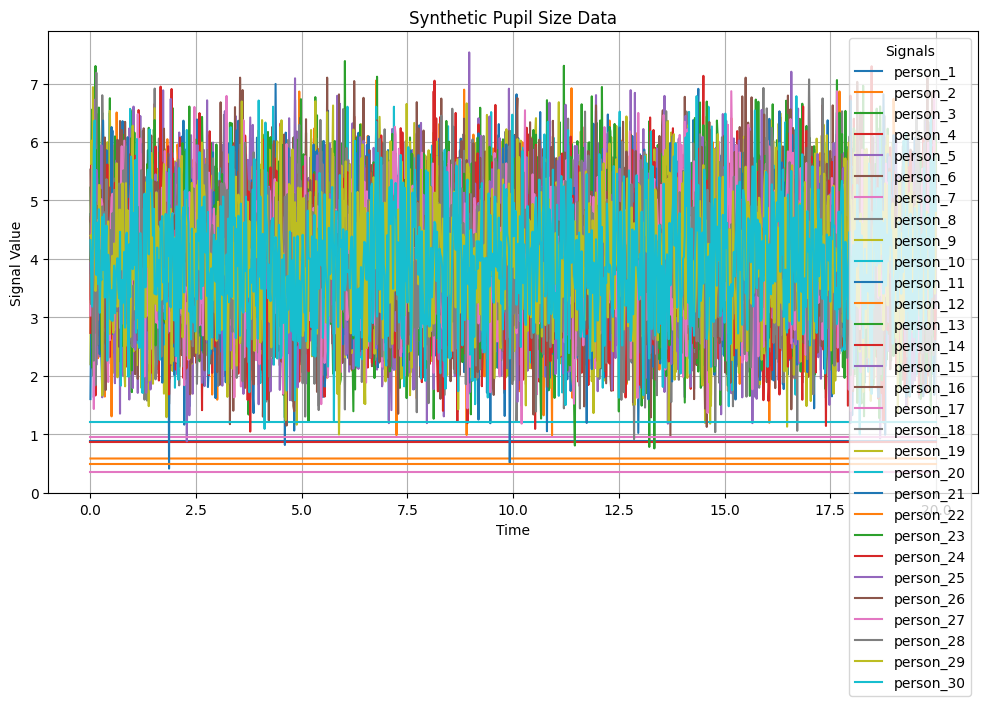

In [41]:
# Generiranje podatkov s pomočjo SDV knjižnice, ki potrebuje metapodatke oz. realne podatke an katerih se "nauči" lastnosti
# v tem primeru sem jih generiral sam p.random.normal
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd
import numpy as np

# Priprava začetnih podatkov za učenje (simulirani podatki)
num_individuals = 30  # Število oseb (stolpcev)
num_samples = 1001  # Število časovnih točk (vrstic)

mean_pupil_size = 4.0  # Povprečna velikost zenice
std_pupil_size = 1.0   # Standardni odklon velikosti zenice

# Simuliraj začetne podatke z normalno porazdelitvijo!!! PROBLEM, KER MORAMO PONOVNO GENERIRATI PODATKE!!!
initial_data = pd.DataFrame({
    f"person_{i+1}": np.random.normal(mean_pupil_size, std_pupil_size, num_samples)  # Velikost zenice
    for i in range(num_individuals)
})


# Definicija metapodatkov za sintetične podatke
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=initial_data)  # Samodejno zaznavanje metapodatkov
#print(metadata.to_dict())

# Validacija metapodatkov glede na začetne podatke
#metadata.validate_table(initial_data)

# Inicializacija Gaussian Copula sintetizatorja
synthesizer = GaussianCopulaSynthesizer(metadata)

# Treniranje sintetizatorja na začetnih podatkih
synthesizer.fit(initial_data)

# Generiranje sintetičnih podatkov
synthetic_data = synthesizer.sample(num_rows=1001)
synthetic_data.insert(0, "time", np.arange(0, 20.02, 0.02) )  # Dodaj časovni stolpec


initial_data.insert(0, "time", np.arange(0, 20.02, 0.02))  # Dodaj časovni stolpec
plot_signals(initial_data, title="Initial Pupil Size Data")

# Prikaz sintetičnih podatkov
#print(synthetic_data.head())
plot_signals(synthetic_data, title="Synthetic Pupil Size Data")



In [7]:
# Izračun podobnosti med začetnimi in sintetičnimi podatki generiranimi z uporabo SDV knjižnice
import numpy as np
from sklearn.metrics import mean_squared_error


# Izračun podobnosti z uporabo MSE
mse_values = {}
for column in initial_data.columns[1:]:  # Preskoči stolpec 'time'
    mse = mean_squared_error(initial_data[column], synthetic_data[column])
    mse_values[column] = mse

# Izračun povprečnega MSE čez vse stolpce
average_mse = np.mean(list(mse_values.values()))

# Prikaz rezultatov
#print("MSE za posamezne stolpce:", mse_values)
print("Povprečni MSE:", average_mse)

Povprečni MSE: 4.087992367251403


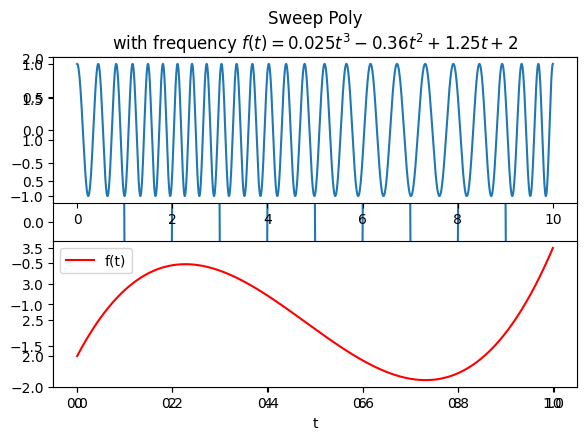

In [ ]:
# preizkus možnosti scipy.signal ki je namenjen bolj za obdelavo signalov...
#TODO: odstrani, ker je samo za testiranje generiranja ss scipy
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t)) # ostale možnosti sigal.sawtooth, signal.square, signal.sawtooth
plt.ylim(-2, 2)

import numpy as np
from scipy.signal import sweep_poly
p = np.poly1d([0.025, -0.36, 1.25, 2.0])
t = np.linspace(0, 10, 5001)
w = sweep_poly(t, p)

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.title("Sweep Poly\nwith frequency " +
          "$f(t) = 0.025t^3 - 0.36t^2 + 1.25t + 2$")
plt.subplot(2, 1, 2)
plt.plot(t, p(t), 'r', label='f(t)')
plt.legend()
plt.xlabel('t')
plt.tight_layout()
plt.show()

In [33]:
# Preizkus orodja pyCANON za anonimizacijo podatkov - pyCANON 
# is a Python library which allows the user to know the anonymity level of a dataset 
# based on a set of quasi-identifiers (QI), and a set of sensitive attributes. 

from pycanon import anonymity


data = pd.DataFrame({
    "age": [34, 34, 45, 45, 66, 66],
    "income": [50000, 55000, 60000, 62000, 70000, 75000]
})
# data = pd.concat([data, data], ignore_index=True)
k = anonymity.k_anonymity(data, ["age"])
print(f"k-anonymity: {k}")

alpha, k = anonymity.alpha_k_anonymity(data, ["age"], ["income"])
print(f"alpha k-anonymity: {alpha}, {k}")


data_2 = pd.DataFrame({
    "age": ["30-40", "30-40", "30-40", "60-70", "60-70", "60-70"],
    "income": [50000, 55000, 60000, 65000, 70000, 75000]
})
k = anonymity.k_anonymity(data_2, ["age"])
print(f"k-anonymity: {k}")

alpha, k = anonymity.alpha_k_anonymity(data_2, ["age"], ["income"])
print(f"alpha k-anonymity: {alpha}, {k}")

k-anonymity: 2
alpha k-anonymity: 0.5, 2
k-anonymity: 3
alpha k-anonymity: 0.3333333333333333, 3


In [ ]:
# Primer uporabe knjižnice pyCANON za anonimizacijo podatkov
# import pandas as pd
# from pycanon import anonymity, report

# FILE_NAME = "data/adult.csv"
# QI = ["age", "education", "occupation", "relationship", "sex", "native-country"]  # Quasi-identifiers
# SA = ["salary-class"]
# DATA = pd.read_csv(FILE_NAME)
# DATA.columns = DATA.columns.str.strip()


# # Calculate k for k-anonymity:
# k = anonymity.k_anonymity(DATA, QI)

# # Print the anonymity report:
# report.print_report(DATA, QI, SA)

c for (c,l)-diversity cannot be calculated as l=1
The dataset verifies:
          	 - k-anonymity with k = 1
          	 - (alpha,k)-anonymity with alpha = 1.0 and k = 1
          	 - l-diversity with l = 1
          	 - entropy l-diversity with l = 1
          	 - (c,l)-diversity with c = nan and l = 1
          	 - basic beta-likeness with beta = 3.152659099604642
          	 - enhanced beta-likeness with beta = 1.423748875944647
          	 - t-closeness with t = 0.7591904425539756
          	 - delta-disclosure privacy with delta = 2.98259391741754


In [ ]:
# preizkus uporabe SDV knjižnice za generiranje sintetičnih podatkov in preverjanje anonimnosti
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata


data = pd.DataFrame({
    "age": [34, 34, 45],
    "income": [50000, 55000, 60000]
})


# Nastavitev metapodatkov
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Ročna specifikacija distribucij
model = GaussianCopulaSynthesizer(
    metadata=metadata,
    numerical_distributions={
        "income": "gamma",  # Za pozitivne kontinuirane vrednosti
        "age": "uniform"    # Za diskretne starosti
    },
    default_distribution="gamma"
)
model.fit(data)
synthetic_data = model.sample(num_rows=100)
print(synthetic_data)

synthetic_data["income"] = pd.cut(synthetic_data["income"], bins=[0, 50000, 60000, 100000], labels=["low", "mid", "high"])
# Generalizirajte starost v desetletja
synthetic_data["age_group"] = pd.cut(
    synthetic_data["age"], 
    bins=[30, 40, 50, 60, 70],
    labels=["30-40", "40-50", "50-60", "60-70"]
)

print(synthetic_data)
k = anonymity.k_anonymity(synthetic_data, ["income", "age_group"])
print(f"k-anonymity: {k}")
# Minimalno število enakih kombinacij kvazi-identifikatorjev. k=3 pomeni, da vsaka kombinacija kvazi-ID-jev nastopa vsaj 3-krat


    age  income
0    43   59777
1    42   57590
2    42   59214
3    39   55168
4    36   52574
..  ...     ...
95   43   56006
96   35   50000
97   39   53016
98   40   52268
99   34   50000

[100 rows x 2 columns]
    age income age_group
0    43    mid     40-50
1    42    mid     40-50
2    42    mid     40-50
3    39    mid     30-40
4    36    mid     30-40
..  ...    ...       ...
95   43    mid     40-50
96   35    low     30-40
97   39    mid     30-40
98   40    mid     30-40
99   34    low     30-40

[100 rows x 3 columns]
k-anonymity: 12


c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\pycanon\anonymity\utils\aux_anonymity.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = data.groupby(by=quasi_ident)


In [ ]:
# preizkus anoniomizacije z uporabo anjana knjižnice
# Anjana is a Python library for data anonymization. It provides functions to 
# apply k-anonymity, l-diversity and t-closeness to a dataset.
import pandas as pd
import anjana
from anjana.anonymity import k_anonymity, l_diversity, t_closeness

# Read and process the data
data = pd.read_csv("data/adult.csv") 
data.columns = data.columns.str.strip()
cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "sex",
    "native-country",
]
for col in cols:
    data[col] = data[col].str.strip()

# Define the identifiers, quasi-identifiers and the sensitive attribute
quasi_ident = [
    "age",
    "education",
    "marital-status",
    "occupation",
    "sex",
    "native-country",
]
ident = ["race"]
sens_att = "salary-class"

# Select the desired level of k, l and t
k = 10    # Vsaka skupina mora vsebovati ≥10 zapisov
l_div = 2 # Vsaka skupina mora imeti ≥2 različni vrednosti "salary-class"
t = 0.5   # Porazdelitev "salary-class" v skupini se sme največ 50% razlikovati od celotne porazdelitve
supp_level = 50 # Dovoljeno število izbrisanih zapisov

# Import the hierarquies for each quasi-identifier. Define a dictionary containing them
hierarchies = {
    "age": dict(pd.read_csv("data/hierarchies/age.csv", header=None)),
    "education": dict(pd.read_csv("data/hierarchies/education.csv", header=None)),
    "marital-status": dict(pd.read_csv("data/hierarchies/marital.csv", header=None)),
    "occupation": dict(pd.read_csv("data/hierarchies/occupation.csv", header=None)),
    "sex": dict(pd.read_csv("data/hierarchies/sex.csv", header=None)),
    "native-country": dict(pd.read_csv("data/hierarchies/country.csv", header=None)),
}

# Apply the three functions: k-anonymity, l-diversity and t-closeness
data_anon = k_anonymity(data, ident, quasi_ident, k, supp_level, hierarchies)

# Koraki algoritma:
# Supresija identifikatorjev: Stolpec race se odstrani ali zamenja z generičnimi vrednostmi.
# Grupiranje: Zapisom dodeli skupine z enakimi kvazi-ID (npr. vsi 30-40 letniki z doktoratom).
# Generalizacija: Uporabi hierarhije za nadomestitev natančnih vrednosti (npr. "Doctorate" → "Higher Education").
# Preverjanje k-anonimnosti: Izbrise zapise, kjer skupine nimajo vsaj 10 članov.


# data_anon = l_diversity(
#     data_anon, ident, quasi_ident, sens_att, k, l_div, supp_level, hierarchies
# )
# data_anon = t_closeness(
#     data_anon, ident, quasi_ident, sens_att, k, t, supp_level, hierarchies
# )



In [11]:
# Save the anonymized data
# data_anon.to_csv("data/anonymized_data.csv", index=False)

# kaj se zgodi: podatki so anonimizirani na način, da so vrrednosti postavljene v neko kategorijo, ki je definirana v hierarhiji
# npr. bachelor, master, phd so združeni v eno kategorijo education: high_education

In [ ]:
# Primer uporabe OpenDP knjižnice za diferencirano zasebnost - ki pomeni, da se podatki anonimizirajo tako, da se ohrani
# statistična zasebnost, vendar se podatki lahko uporabijo za statistične analize
import opendp.prelude as dp
dp.enable_features('contrib')
space = (dp.atom_domain(T=float), dp.absolute_distance(T=float))
laplace_mechanism = space >> dp.m.then_laplace(scale=1.)
dp_value = laplace_mechanism(123.0)
print(dp_value)

122.58326366161921


In [31]:
import opendp.prelude as dp
dp.enable_features("contrib")

# 1. Nastavitve zasebnosti
privacy_unit = dp.unit_of(contributions=1)  # Vsak posameznik prispeva 1 zapis
privacy_loss = dp.loss_of(epsilon=1.)       # Skupni proračun ε=1.0 Manjši ε → večja zasebnost (manj natančni rezultati).Večji ε → manjša zasebnost (natančnejši rezultati).
bounds = (0.0, 100.0)                      # Omejitve za podatke (zmanjša občutljivost)
imputed_value = 50.0                        # Vrednost za zapolnjevanje manjkajočih podatkov

# 2. Generacija testnih podatkov
from random import randint
data = [float(randint(0, 100)) for _ in range(100)]
mean_original = sum(data) / len(data)       # Originalno povprečje (nezaščiteno)

# 3. Inicializacija konteksta z diferencialno zasebnostjo
context = dp.Context.compositor(
    data=data,
    privacy_unit=privacy_unit,
    privacy_loss=privacy_loss,
    split_evenly_over=3  # Razdeli ε=1.0 na 3 poizvedbe (ε=0.33 na poizvedbo). Vsaka poizvedba (npr. štetje, povprečje) ima svojo porabo ε.
)

count_query = (
    context.query()
    .count()                # Izračun števila zapisov (občutljivost Δ=1)
    .laplace()              # Laplaceov šum s scale=Δ/ε=1/0.33≈3.0
)

scale = count_query.param() # scale=3.0 (izračunan iz ε=0.33)
accuracy = dp.discrete_laplacian_scale_to_accuracy(scale=scale, alpha=0.05) # ≈8.0 (95% CI)
dp_count = count_query.release() # Privatizirano število (npr. 105 ±8)
print(f'scale, accuracy, dp_count: {scale}, {accuracy}, {dp_count}')

confidence_interval = (dp_count - accuracy, dp_count + accuracy)
# Privatizirano število (dp_count) = 105 (primer)
# Izračunana natančnost (accuracy) = 8.0
# confidence_interval = (105 - 8.0, 105 + 8.0) = (97, 113)
print(f'confidential interval: {confidence_interval}')


mean_query = (
    context.query()
    .clamp(bounds)          # Omeji vrednosti na [0.0, 100.0] (Δ=100.0)
    .resize(
        size=dp_count,      # Uporabi privatizirano število za prilagoditev velikosti
        constant=imputed_value # Zapolni manjkajoče vrednosti s 50.0
    )
    .mean()                 # Povprečje s sensitivity=Δ/size=100.0/dp_count
    .laplace()              # Šum scale= (100/dp_count)/0.33 ≈ 303.0/dp_count
)

dp_mean = mean_query.release() # Privatizirano povprečje (npr. 52.3 ±3.1)
print(dp_mean)
print(mean_original)

scale, accuracy, dp_count: 3.0000000000000004, 9.445721638273584, 106
confidential interval: (96.55427836172642, 115.44572163827358)
52.79987903536238
54.47


In [ ]:
def anonymize_signals(originalni_signali_df, method_code, method_parameters):
    """
    Funkcija za anonimizacijo signalov.

    Args:
        originalni_signali_df (pandas.DataFrame): DataFrame z originalnimi signali (vključuje stolpec 'time').
        method_code (str): Koda metode za anonimizacijo ('quant' za kvantizacijo).
        method_parameters (dict): Parametri metode {'min': 0, 'max': 10, 'dif': 0.2}.

    Returns:
        anonimizirani_signali_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.
    """
    anonimizirani_signali_df = originalni_signali_df.copy()

    # Podvzorčenje
    subsample_rate = method_parameters.get('subsample_rate', 1)
    anonimizirani_signali_df = anonimizirani_signali_df.iloc[::subsample_rate].reset_index(drop=True)

    if method_code == 'quant':
        min_val = method_parameters.get('min', 0)
        max_val = method_parameters.get('max', 10)
        dif = method_parameters.get('dif', 0.2)
        #     for column in anonimizirani_signali_df.columns[1:]:
        #         anonimizirani_signali_df[column] = np.round((anonimizirani_signali_df[column] - min_val) / step) * step + min_val
        #         # Omeji vrednosti na [min, max]
        #         anonimizirani_signali_df[column] = np.clip(anonimizirani_signali_df[column], min_val, max_val)

        anonimizirani_signali_df.iloc[:, 1:] = np.round((anonimizirani_signali_df.iloc[:, 1:] - min_val) / dif) * dif + min_val
        #kvantizacija signal knjižnica?
        
        # Omeji vrednosti na [min, max]
        anonimizirani_signali_df.iloc[:, 1:] = np.clip(anonimizirani_signali_df.iloc[:, 1:], min_val, max_val)
    
    elif method_code == 'white_noise':
        std = method_parameters.get('std', 0.5)
        for column in anonimizirani_signali_df.columns[1:]:
            anonimizirani_signali_df[column] = anonimizirani_signali_df[column] + np.random.normal(0, std, len(anonimizirani_signali_df))

    return anonimizirani_signali_df


       time  signal_1  signal_2  signal_3  signal_4  signal_5  signal_6  \
0      0.00       5.5       6.5       5.0       4.5       5.0       4.5   
1      0.02       3.5       2.5       3.0       4.0       3.5       3.0   
2      0.04       4.0       5.0       3.5       4.0       3.0       5.0   
3      0.06       4.5       4.0       3.5       3.5       5.0       4.0   
4      0.08       4.5       3.5       3.5       4.5       4.5       2.0   
...     ...       ...       ...       ...       ...       ...       ...   
996   19.92       2.5       3.0       2.5       3.0       6.0       2.5   
997   19.94       4.5       2.5       4.5       5.0       4.0       3.0   
998   19.96       5.0       4.5       6.0       4.0       6.0       4.5   
999   19.98       3.0       2.0       4.5       4.0       4.0       4.0   
1000  20.00       3.0       3.5       4.5       4.5       4.0       5.0   

      signal_7  signal_8  signal_9  ...  signal_11  signal_12  signal_13  \
0          4.5       4.

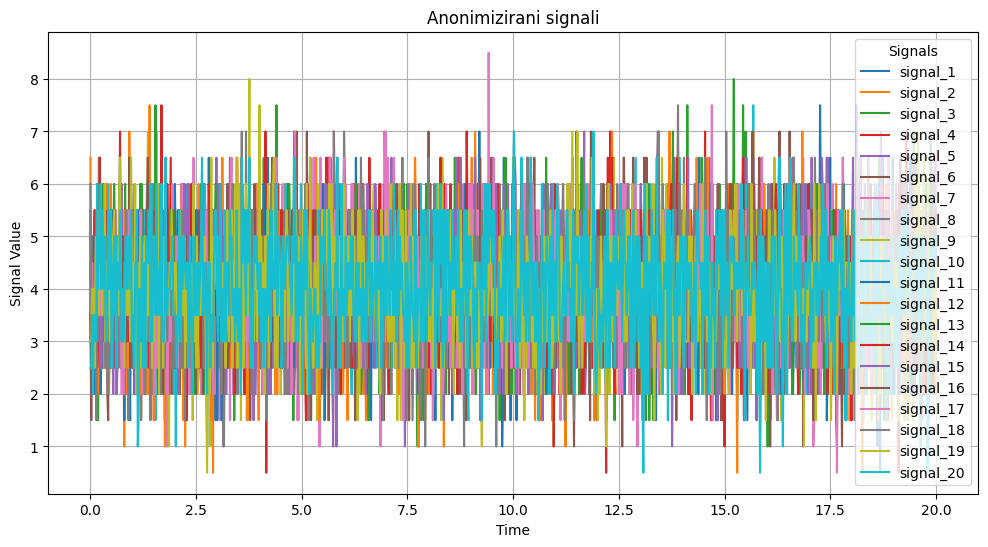

In [15]:
# Anonimizacija podatkov
meth_code = 'quant'
meth_pars = {'min': 0, 'max': 10, 'dif': 0.5}
Y_df = anonymize_signals(signals_with_corr, meth_code, meth_pars)

# Prikaz rezultatov
print(Y_df)
plot_signals(Y_df, 'Anonimizirani signali')

In [ ]:
import pandas as pd
import numpy as np

def anonim_count(X_df, Y_df):
    """
    Funkcija za izračun števila anonimiziranih vrednosti.
    TODO:
    Preveri kako knjižnica naredi - npr k-anonimity, l-diversity, t-closeness?

    Args:
        X_df (pandas.DataFrame): DataFrame z originalnimi signali.
        Y_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.

    Returns: 
        pandas.DataFrame: Tabela z signal_ID in številom signalov, ki gredo skozi enake razrede anonimizacije.
    """
    meth_code = 'quant'
    meth_pars = {'min': 0, 'max': 10, 'dif': 0.5}
    anonimizirani_original = anonymize_signals(X_df, meth_code, meth_pars)

    results = []

    for column in anonimizirani_original.columns[1:]:
        count = 0
        for column2 in X_df.columns[1:]:
            if (anonimizirani_original[column] == Y_df[column2]).all():
                count += 1 
        results.append({'signal_ID': column, 'count': count})
    
    result_df = pd.DataFrame(results)
    return result_df

In [17]:
# print(signals_with_corr.iloc[:, :3])
# print("\n **** \n")
# print(Y_df.iloc[:, :3])
anonim_count(signals_with_corr, Y_df)

,signal_ID,count
0,signal_1,1
1,signal_2,1
2,signal_3,1
3,signal_4,1
4,signal_5,1
5,signal_6,1
6,signal_7,1
7,signal_8,1
8,signal_9,1
9,signal_10,1


In [18]:
# Generiranje enakih signalov, za testiranje
def generate_same_signals(time, mu, std, ac, N):
    """
    Funkcija generira N enakih naključnih signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        ac (float): Korelacija med signali (trenutno ne uporabljeno).
        N (int): Število signalov.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """
    # Generiraj en naključni signal iz normalne porazdelitve
    single_signal = np.random.normal(mu, std, size=len(time))
    
    # Ustvari matriko z N kopijami tega signala
    data = np.tile(single_signal, (N, 1)).T
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    sameSignals_df = pd.DataFrame(data, columns=[f"same_signal_{i+1}" for i in range(N)])
    sameSignals_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    
    return sameSignals_df

def generate_same_signals2(time, mu, std, ac, N):
    """
    Funkcija generira N enakih naključnih signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        ac (float): Korelacija med signali (trenutno ne uporabljeno).
        N (int): Število signalov.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """
    # Generiraj en naključni signal iz normalne porazdelitve
    single_signal = np.random.normal(mu, std, size=len(time))
    
    # Ustvari matriko z N kopijami tega signala
    data = np.tile(single_signal, (N, 1)).T
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    sameSignals_df = pd.DataFrame(data, columns=[f"same_signal2_{i+1}" for i in range(N)])
    sameSignals_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    
    return sameSignals_df

time = np.arange(0, 20.00, 0.2)  # Časovni intervali od 0 do 20 s korakom 0.02
mu = 4                            # Povprečje
std = 0.5                           # Standardni odklon
ac = 0                            # Korelacija (trenutno ni uporabljena)
N = 5                           # Število signalov

same_signals_df = generate_same_signals(time, mu, std, ac, N)
same_signals_df_2 = generate_same_signals2(time, 4, 0.4, ac, 5)
random_signal_df = generate_rand_signals(time, mu, std, ac, N)

#plot_signals(random_signal_df)
plot_signals(same_signals_df, 'Enaki signali')
zdruzeni_signali = pd.concat([same_signals_df, random_signal_df.iloc[:, 1:], same_signals_df_2.iloc[:,1:]], axis=1)
#plot_signals(zdruzeni_signali)

meth_pars = {
    'min': 3, 
    'max': 4, 
    'dif': 2, 
    'std': 0.1,
    'subsample_rate': 5  # Vzame vsako peto meritev
} 
signali_s_sumom = anonymize_signals(zdruzeni_signali, 'white_noise', meth_pars)
plot_signals(signali_s_sumom, 'Anonimizirani signali z belim šumom')

anonimizirani_in_kvant = anonymize_signals(signali_s_sumom, 'quant', {'min': 3, 'max': 5, 'dif': 1})
plot_signals(anonimizirani_in_kvant, 'Šumljeni in kvantizirani signali')
anonim_count(zdruzeni_signali, anonimizirani_in_kvant)


ValueError: Unsupported distribution type. Choose 'normal', 'uniform', or 'exponential'.